In [163]:
#import packages
import pandas as pd
import numpy as np
!pip install investpy
import investpy

#to plot within notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
#for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM



In [164]:
#Company: Asian Paints
df = investpy.get_stock_historical_data(stock='ASPN',country='India',from_date='01/01/2010',to_date='31/12/2020')

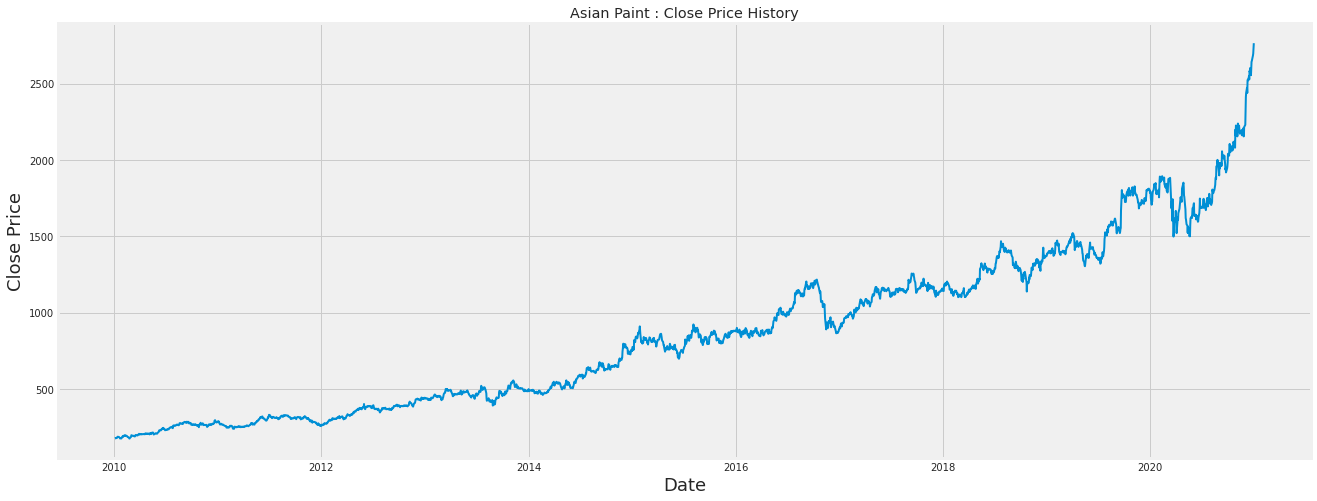

In [165]:
#Visualization of data
plt.figure(figsize=(20,8))
plt.title('Asian Paint : Close Price History')
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [155]:
#to get the training data
training_dataset= investpy.get_stock_historical_data(stock='ASPN',country='India',from_date='01/01/2010',to_date='31/12/2019')
data_len=len(training_dataset)

In [166]:
#dataframe with only the 'Close column'
df = df.sort_index(ascending=True, axis=0)
df['date']=df.index
df1=df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=df1.values
# Seprate rows to train  and test the model on
train = dataset[0:data_len,:]
test = dataset[data_len:,:]
# Scale the data
scaled_data = scaler.fit_transform(dataset)

In [167]:
# Preprocess the training data set
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [173]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, epochs=1, batch_size=1)

2418/2418 [==============================] - 76s 30ms/step - loss: 6.7456e-04


In [174]:
# Preprocess data sets x_test and y_test
inputs = df1[len(df1) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the models predicted price values 
closing_price = model.predict(X_test)
# Convert the scaled output to normal data
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


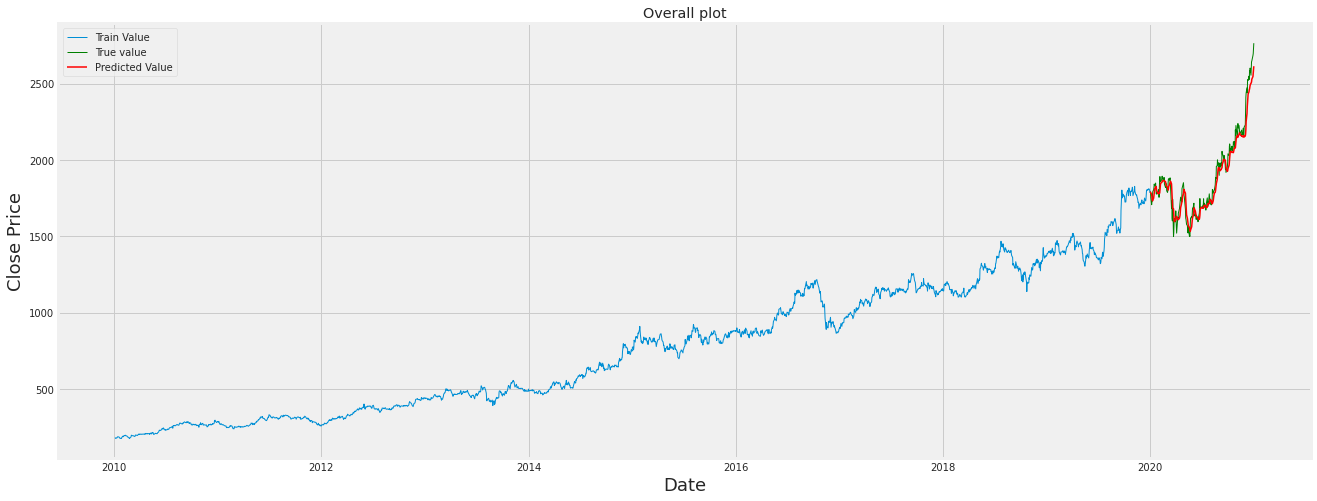

In [175]:
# Visualize the data
plt.figure(figsize=(20,8))
plt.title('Overall plot')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
train = df1[:data_len]

test = df1[data_len:]
test['Predictions'] = closing_price
plt.plot(train['Close'],linewidth=1)
plt.plot(test[['Close']],linewidth=1,linestyle='-',color='green')
plt.plot(test[['Predictions']],linewidth=1.5,color='red',linestyle='-')
plt.legend(['Train Value', 'True value', 'Predicted Value'], loc='upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


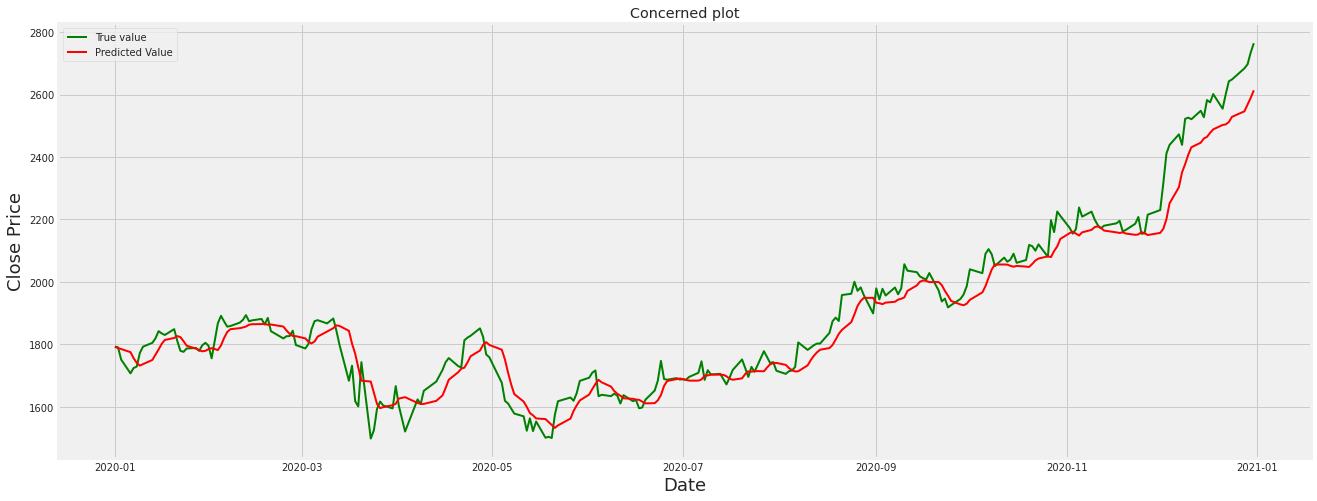

In [176]:
# Visualize the data
plt.figure(figsize=(20,8))
plt.title('Concerned plot')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
train = df1[:data_len]

test = df1[data_len:]
test['Predictions'] = closing_price

plt.plot(test[['Close']],linewidth=2,linestyle='-',color='green')
plt.plot(test[['Predictions']],linewidth=2,color='red')
plt.legend([ 'True value', 'Predicted Value'], loc='upper left')


